<h1 style="text-align: center">Звіт про виконання практичного завдання з навчальної практики з програмування</h1>

<p>Мета: Метою цієї практичної роботи є вивчення та розуміння функцій Лаґерра, їх обчислення та табулювання, проведення обчислювального експерименту для визначення точки при якій значення всіх функції Лаґерра менші за ε, обчислення значень інтегралів, виконання прямого та оберненого ПЛ для заданої функції, а також побудову графіків для візуалізації результатів. Розобка троьох програм: на Python, на Python використовуючи принципи ООП, а також на C#</p>

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import unittest
from IPython.display import display
%matplotlib ipympl
plt.ioff()

<h2>Реалізація програми Лаґерра на Python</h2>

In [ ]:
# coode

<h2>Реалізація програми Лаґерра на Python імплементуючи принципи ООП</h2>

In [48]:
class Service:
    # Function for integration
    # f: calleble function - function
    # a: float - left boundary
    # b: float - right boundary
    # margin: float - error
    @staticmethod
    def integrate(f, a: float, b:float , margin=0.001):
        if a > b:
            raise ValueError("left bounder must be lower then right")
        area = 0
        while (abs(b-a) > margin):
            area += margin*f(a+margin/2)
            a += margin
        return area

In [49]:
class Laguerre:
    def __init__(self, func, T, beta: int, sigma: int, N: int, epsilon=1e-3):
        if beta > sigma:
            raise ValueError("sigma must be greater than beta")
        self._func = func #: calleble function - function
        self.T = T # : float - ceil value for calculating experiment
        self.beta = beta #: float - beta for laguerre function
        self.sigma = sigma #: float - sigma for laguerre function
        self.N = N # int - max power of laguerre function
        self.epsilon = epsilon #: float - calculation error
        self._recalc()

    @property
    def func(self):
        return self._func

    @func.setter
    def func(self, value):
        print("This is read-only value")

    @property
    def laguerre_transformation_value(self):
        if self._laguerre_transformation_value is None:
            self._laguerre_transformation_value = self.laguerre_transformation()
        return self._laguerre_transformation_value

    @laguerre_transformation_value.setter
    def laguerre_transformation_value(self, value):
        print("This is read-only value")

    @property
    def experiment_value(self):
        if self._experiment_value is None:
            self._experiment_value = self.experiment()
        return self._experiment_value

    @experiment_value.setter
    def experiment_value(self, value):
        print("This is read-only value")

    @property
    def T(self):
        return self._T

    @T.setter
    def T(self, value):
        if value <= 0:
            raise ValueError("T must be positive")
        self._recalc()
        self._T = value

    @property
    def beta(self):
        return self._beta

    @beta.setter
    def beta(self, value):
        if value < 0:
            raise ValueError("Beta must be non-negative")
        self._recalc()
        self._beta = value

    @property
    def sigma(self):
        return self._sigma

    @sigma.setter
    def sigma(self, value):
        if value < 0:
            raise ValueError("Sigma must be non-negative")
        self._recalc()
        self._sigma = value

    @property
    def N(self):
        return self._N

    @N.setter
    def N(self, value):
        if value < 1:
            raise ValueError("N must be at least 1")
        self._recalc()
        self._N = value

    @property
    def epsilon(self):
        return self._epsilon

    @epsilon.setter
    def epsilon(self, value):
        if value <= 0:
            raise ValueError("Epsilon must be positive")
        self._recalc()
        self._epsilon = value

    def _recalc(self):
        self._experiment_value = None
        self._laguerre_transformation_value = None

    def laguerre_function(self, t, n):
        if self.beta < 0 or self.beta > self.sigma or n < 0:
            raise ValueError("Wrong parameters")

        lpp = np.sqrt(self.sigma)*np.exp(-self.beta*t/2)
        lp = np.sqrt(self.sigma)*(1 - self.sigma*t)*np.exp(-self.beta*t/2)

        if n == 0:
            return lpp
        if n == 1:
            return lp

        for i in range(2, n+1):
            temp = lp
            lp = (2*i - 1 - self.sigma*t)*lp/i - (i-1)*lpp / i
            lpp = temp

        return lp

    def experiment(self):
        t = np.linspace(0, self.T, 1000)
        n = range(0, self.N+1)
        true_for_all = False
        result = 0
        for i in t:
            for j in n:
                if abs(self.laguerre_function(i, j)) < self.epsilon:
                    true_for_all = True
                else:
                    true_for_all = False
            if true_for_all:
                result = i
                break
        else:
            result = None
        if result == None:
            raise "The experiment is failed, there is no T that satisfy condition. You can set bigger max T to check"
        self._experiment_value = result
        return result

    def laguerre_transformation(self):
        to = self.experiment_value
        result = [Service.integrate(lambda t: self._func(t)*self.laguerre_function(t, k)
                                    * np.exp(-t*(self.sigma-self.beta)), 0, to, self.epsilon) for k in range(self.N+1)]
        self._laguerre_transformation_value = result
        return result

    def reverse_laguerre_transformation(self, t):
        sum = 0
        for k in range(self.N):
            sum += self.laguerre_transformation_value[k] * \
                self.laguerre_function(t, k)
        return sum

In [50]:
class Laguerre_Tabulator(Laguerre):
    def __init__(self, func, T, beta, sigma, N, epsilon):
        if beta > sigma:
            raise ValueError("sigma must be greater than beta")
        super().__init__(func, T, beta, sigma, N, epsilon)

    def tabulate_laguerre(self, n, to):
        t = np.linspace(1, to, to)
        results = self.laguerre_function(t, n)
        df = pd.DataFrame({'t': t, 'l(t)': results})
        return df

    def tabulate_experiment(self):
        t = self.experiment_value
        lt_values = []
        for n in range(0, self.N+1):
            lt_values.append(self.laguerre_function(t, n))
        cols = {"t": [t]*(self.N+1), "n": range(0,
                                                self.N+1), "L(t)": lt_values}

        return pd.DataFrame(cols)

    def tabulate_laguerre_transformation(self):
        transformed = self.laguerre_transformation_value
        cols = {"n": range(0, self.N+1),
                "transformed": transformed}
        return pd.DataFrame(cols).round(5)

In [68]:
class Visualize:
    @staticmethod
    def draw_lauguerre(laguerre_instance, t=None):
        if t is None:
            t = laguerre_instance.experiment_value
        x = np.arange(0, t, 0.01)
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title(r'Laguerre polynomials $L_n$')
        for n in np.arange(0, laguerre_instance.N+1):
            ax.plot(x, laguerre_instance.laguerre_function(
                x, n), label=rf'$L_{{{n}}}$')
        ax.set_xlabel('t')
        ax.set_ylabel('L(t)')
        ax.legend()
        ax.grid(True)
        display(fig.canvas)

    @staticmethod
    def draw_reverse_transformation(laguerre_instance, a: float, b: float):
        if a < 0:
            raise ValueError("left boundary must be >= 0")

        def reverse_transformation_func(t):
            return laguerre_instance.reverse_laguerre_transformation(t)
        num = int((b-a)*100)
        t_values = np.linspace(a, b, num)
        f_y_values = np.vectorize(laguerre_instance.func)(t_values)
        f_rlt_y_values = np.vectorize(reverse_transformation_func)(t_values)
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(t_values, f_y_values, label=f"Function")
        ax.plot(t_values, f_rlt_y_values,
                 label="Reverse laguerre transformation")
        ax.set_xlabel('t')
        ax.set_ylabel('Function Value')
        ax.set_title(f'Plot of {laguerre_instance.func.__name__} function with params:\nβ={laguerre_instance.beta}, σ={laguerre_instance.sigma}, T={laguerre_instance.T}, N={laguerre_instance.N}, ε={laguerre_instance.epsilon}')
        ax.legend()
        ax.grid(True)
        display(fig.canvas)

In [69]:
class UI:
    def __init__(self, laguerre_instance):
        self.laguerre_instance = laguerre_instance
        self.laguerre_tabulator_instance = Laguerre_Tabulator(
            laguerre_instance.func, laguerre_instance.T, laguerre_instance.beta, laguerre_instance.sigma, laguerre_instance.N, laguerre_instance.epsilon)

    def draw_lauguerre(self, N, to, beta, sigma):
        self.laguerre_instance.N = N
        self.laguerre_instance.beta = beta
        self.laguerre_instance.sigma = sigma
        Visualize.draw_lauguerre(self.laguerre_instance, to)

    def draw_reverse_transformation(self, N, T, beta, sigma, a, b):
        self.laguerre_instance.T = T
        self.laguerre_instance.N = N
        self.laguerre_instance.beta = beta
        self.laguerre_instance.sigma = sigma
        Visualize.draw_reverse_transformation(self.laguerre_instance, a, b)


    def tubulate_experiment(self, N, T, beta, sigma):
        self.laguerre_tabulator_instance.T = T
        self.laguerre_tabulator_instance.N = N
        self.laguerre_tabulator_instance.beta = beta
        self.laguerre_tabulator_instance.sigma = sigma
        display(self.laguerre_tabulator_instance.tabulate_experiment())

    def tabulate_laguerre(self, beta, sigma, to, n):
        self.laguerre_tabulator_instance.beta = beta
        self.laguerre_tabulator_instance.sigma = sigma
        display(self.laguerre_tabulator_instance.tabulate_laguerre(
            n, to).set_index("t"))
        
    def laguerre_func_ui(self):
        slider1 = widgets.IntSlider(min=1, max=20, value=1)
        slider2 = widgets.IntSlider(min=1, max=100, value=1)
        slider3 = widgets.IntSlider(min=1, max=20, value=1)
        slider4 = widgets.IntSlider(min=1, max=20, value=1)
        widgets.interact(self.draw_lauguerre, N=slider1,
                         to=slider2, beta=slider3, sigma=slider4)


    def reverse_transformation_ui(self):
        slider1 = widgets.IntSlider(min=1, max=20, value=1)
        slider2 = widgets.IntSlider(min=100, max=1000, value=100)
        slider3 = widgets.IntSlider(min=1, max=20, value=2)
        slider4 = widgets.IntSlider(min=1, max=20, value=4)
        slider5 = widgets.FloatRangeSlider(
            value=[0, 2*np.pi],
            min=0,
            max=6*np.pi,
            step=0.1,
        )
        widgets.interact(self.draw_reverse_transformation,
                         N=slider1, T=slider2, beta=slider3, sigma=slider4, a=slider5.value[0], b=slider5.value[1])

    def tubulate_experiment_ui(self):
        slider1 = widgets.IntSlider(min=1, max=20, value=1)
        slider2 = widgets.IntSlider(min=1, max=1000, value=100)
        slider3 = widgets.IntSlider(min=1, max=20, value=2)
        slider4 = widgets.IntSlider(min=1, max=20, value=4)
        widgets.interact(self.tubulate_experiment, N=slider1,
                         T=slider2, beta=slider3, sigma=slider4)

    def tabulate_laguerre_ui(self):
        slider1 = widgets.IntSlider(min=1, max=20, value=1)
        slider3 = widgets.IntSlider(min=1, max=20, value=2)
        slider4 = widgets.IntSlider(min=1, max=20, value=4)
        slider5 = widgets.IntSlider(min=1, max=100, value=100)
        widgets.interact(self.tabulate_laguerre, n=slider1,
                         beta=slider3, sigma=slider4, to=slider5)

In [70]:
class Tests(unittest.TestCase):
    # Default test of integration
    def test_integration_equal(self):
        result = Service.integrate(lambda x: x**2, 0, 4)
        self.assertAlmostEqual(result, 21.333333333, places=4)

    # Test if calculiation rigth
    def test_integration_not_equal(self):
        result = Service.integrate(lambda x: x**2-2, 0, 8)
        self.assertNotAlmostEqual(result, 15.66666666, places=4)

    # Test a>b
    def test_integration_boundaries(self):
        with self.assertRaises(ValueError):
            Service.integrate(lambda x: x**2-2, -2, -6)

    # Test Laguerre constructor
    def test_constructor(self):
        # Test beta validator
        with self.assertRaises(ValueError):
            Laguerre(func_yuliia, 100, -1, 4, 20, 0.001)

        # Test beta < sigma
        with self.assertRaises(ValueError):
            Laguerre(func_yuliia, 100, 4, 2, 20, 0.001)

        # Test epsilon <= 0
        with self.assertRaises(ValueError):
            Laguerre(func_yuliia, 100, 4, 2, 20, 0)

    def test_solve_polynomial(self):
        laguerre_instance = Laguerre(func_stefa, 100, 2, 4, 20, 0.001)

        # Test laguerre function
        result = laguerre_instance.laguerre_function(2, 2)
        self.assertAlmostEqual(result, 4.601399630044832, places=4)

        # Test n < 0
        with self.assertRaises(ValueError):
            laguerre_instance.laguerre_function(2, -1)

    # Test experiment
    def test_experiment(self):
        laguerre_instance = Laguerre(func_ivan, 100, 2, 4, 20, 0.001)
        result = laguerre_instance.experiment()
        self.assertAlmostEqual(result, 79.079079, places=4)

    # Test reverse laguerre transformation
    def test_reverse_transformation(self):
        laguerre_instance = Laguerre(func_demian, 1000, 2, 4, 10, 0.001)
        result = laguerre_instance.reverse_laguerre_transformation(5)
        self.assertAlmostEqual(result, 0.3582483615, places=4)

    # Test tabulate experiment
    def test_experiment_tabulation(self):
        tabulator_instance = Laguerre_Tabulator(
            func_yuliia, 200, 2, 4, 15, 0.001)
        self.assertAlmostEqual(tabulator_instance.tabulate_experiment()[
                               't'][0], 61.26126126126127, places=4)
        self.assertAlmostEqual(tabulator_instance.tabulate_experiment()[
            'L(t)'][15], -9.835768e-04, places=4)

    # Test tabulate laguerre
    def test_experiment_tabulation(self):
        tabulator_instance = Laguerre_Tabulator(
            func_yuliia, 200, 2, 4, 15, 0.001)
        self.assertAlmostEqual(tabulator_instance.tabulate_laguerre(4, 10)[
                               "l(t)"][1], -2.616482, places=4)
        self.assertAlmostEqual(tabulator_instance.tabulate_laguerre(4, 10)[
                               "t"][3], 4.0, places=4)

In [71]:
def func_sonya(t: float):
    if t != 0:
        return np.sin(np.pi/3)-np.arctan(t+t/2)/t
    else:
        return 0

def func_demian(t: float):
    return 2*(np.pi/2-np.arctan(t+np.pi/6))


def func_ivan(t: float):
    if t >= 0 and t <= 2*np.pi:
        return np.pi/3-np.sin(t+3*np.pi/2)
    else:
        return 0


def func_stefa(t: float):
    if t >= 0 and t <= 2*np.pi:
        return -1/200*np.sin(t)*np.e**t
    else:
        return 0


def func_yuliia(t: float):
    return np.cos(t)/t**t

In [72]:
tabulator_instance = Laguerre_Tabulator(func_demian, 100, 2, 4, 10, 0.001)
tabulator_instance.tabulate_experiment()

,t,n,L(t)
0,43.543544,0,2.456458e-19
1,43.543544,1,-4.253951e-17
2,43.543544,2,3.640710e-15
3,43.543544,3,-2.052763e-13
4,43.543544,4,8.576494e-12
5,43.543544,5,-2.831588e-10
6,43.543544,6,7.693555e-09
7,43.543544,7,-1.769005e-07
8,43.543544,8,3.513017e-06
9,43.543544,9,-6.119337e-05


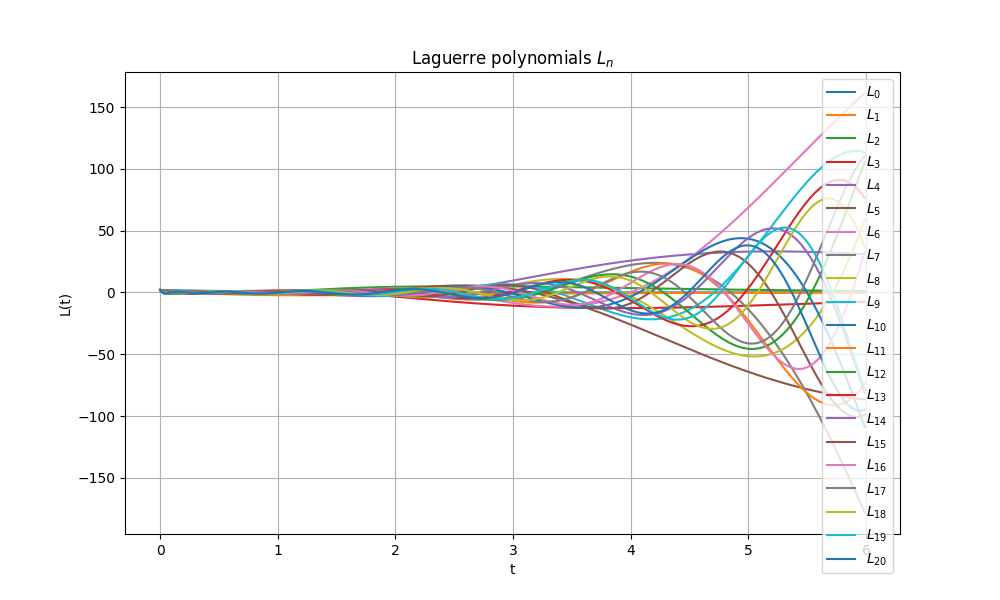

In [73]:
LaguerreInstance = Laguerre(func_demian, 100, 2, 4, 20, 0.001)
Visualize.draw_lauguerre(LaguerreInstance, 6)

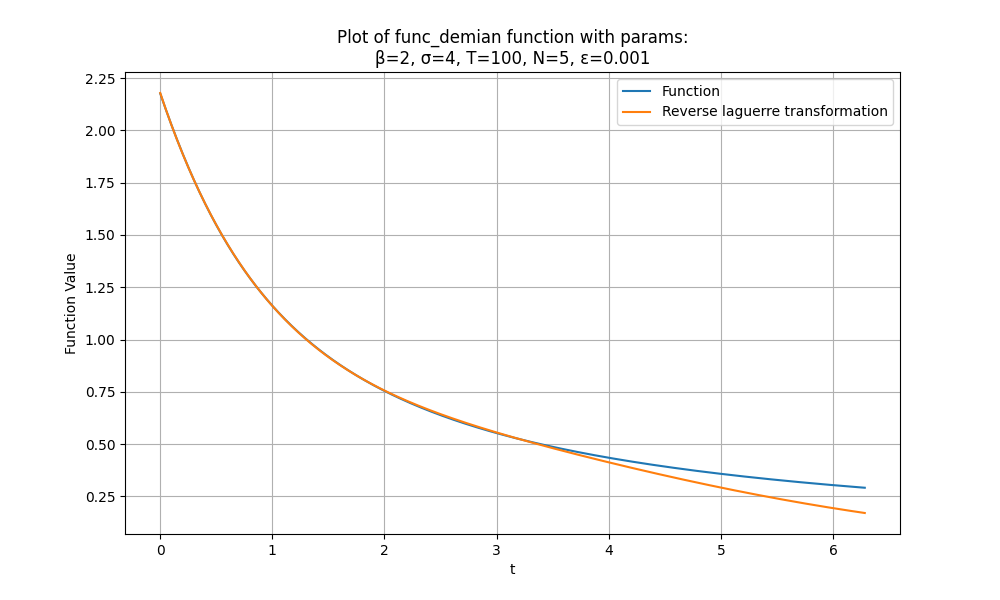

In [74]:
Visualize.draw_reverse_transformation(Laguerre(func_demian, 100, 2, 4, 5, 0.001), 0, 2*np.pi)

In [75]:
LaguerreInstanceUI = UI(Laguerre(func_demian, 100, 2, 4, 20, 0.001))
LaguerreInstanceUI.laguerre_func_ui()

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), IntSlider(value=1, description='to',…

In [76]:
LaguerreInstanceUI.reverse_transformation_ui()

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), IntSlider(value=100, description='T'…

In [53]:
LaguerreInstanceUI.tubulate_experiment_ui()

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), IntSlider(value=100, description='T'…

In [54]:
LaguerreInstanceUI.tabulate_laguerre_ui()

interactive(children=(IntSlider(value=2, description='beta', max=20, min=1), IntSlider(value=4, description='s…

In [55]:
unittest.main(argv=[''], verbosity=3, exit=False)

test_constructor (__main__.Tests.test_constructor) ... ok
test_experiment (__main__.Tests.test_experiment) ... ok
test_experiment_tabulation (__main__.Tests.test_experiment_tabulation) ... ok
test_integration_boundaries (__main__.Tests.test_integration_boundaries) ... ok
test_integration_equal (__main__.Tests.test_integration_equal) ... ok
test_integration_not_equal (__main__.Tests.test_integration_not_equal) ... ok
test_reverse_transformation (__main__.Tests.test_reverse_transformation) ... ok
test_solve_polynomial (__main__.Tests.test_solve_polynomial) ... ok

----------------------------------------------------------------------
Ran 8 tests in 10.506s

OK


<h2>Візуалізація результатів виконання програми Лаґерра на C#</h2>

In [56]:
tabulatedExperiment = pd.read_csv("../LaguerreCSharp/data/tabulatedExperiment.csv")
tabulatedExperiment.rename(columns={'t_funcDemian': 't', 'L_(t)_funcDemian': 'L(t)'})[['t', 'L(t)']]

,t,L(t)
0,0,2.012482e-22
1,1,-4.057215e-20
2,2,4.049053e-18
3,3,-2.666741e-16
4,4,1.303750e-14
5,5,-5.046054e-13
6,6,1.610309e-11
7,7,-4.357371e-10
8,8,1.020409e-08
9,9,-2.100466e-07


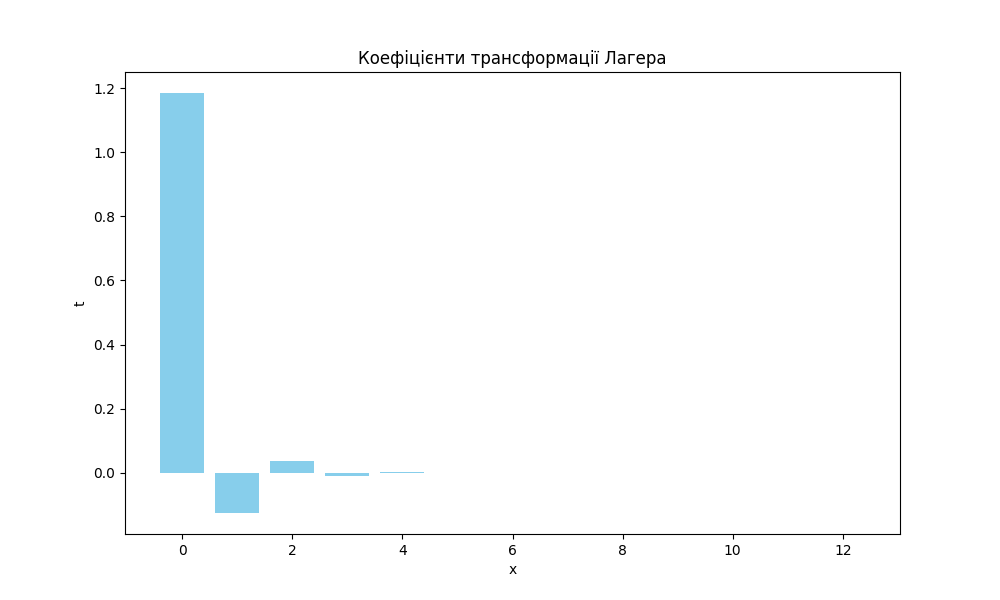

In [57]:
tabulateLaguerreTransformation = pd.read_csv("../LaguerreCSharp/data/tabulateLaguerreTransformation.csv")
tabulateLaguerreTransformation
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(tabulateLaguerreTransformation['x'], tabulateLaguerreTransformation['t_funcDemian'], color='skyblue')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_title('Коефіцієнти трансформації Лагера')
display(fig.canvas)

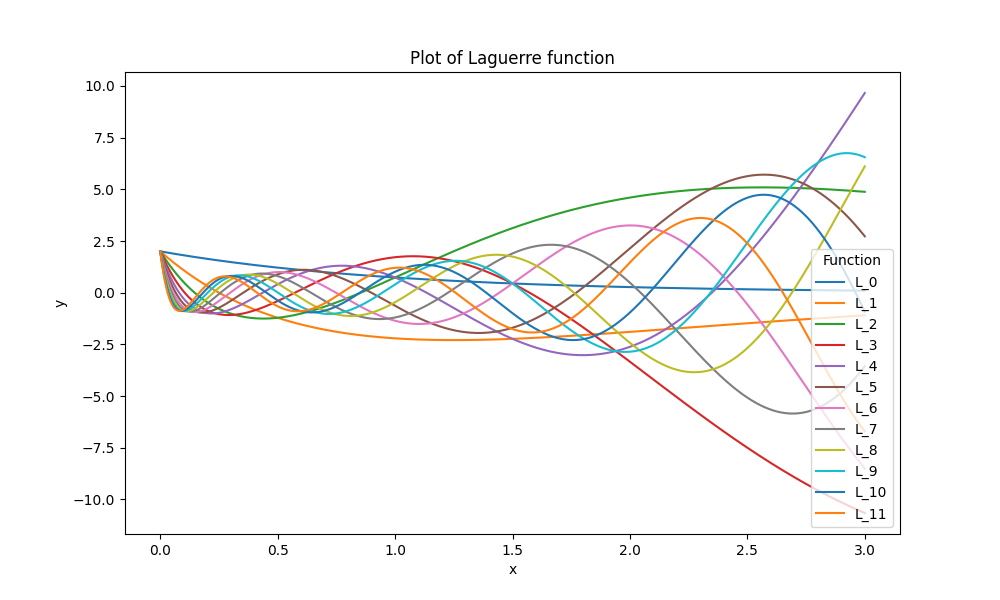

In [58]:
lauguerreFuncData = pd.read_csv("../LaguerreCSharp/data/lauguerreFuncData.csv")
function_names = lauguerreFuncData.columns[1:]

fig, ax = plt.subplots(figsize=(10, 6))
for function_name in lauguerreFuncData.columns[1:]:
    ax.plot(lauguerreFuncData['x'], lauguerreFuncData[function_name], label=function_name)
ax.set_title("Plot of Laguerre function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(title="Function")
display(fig.canvas)

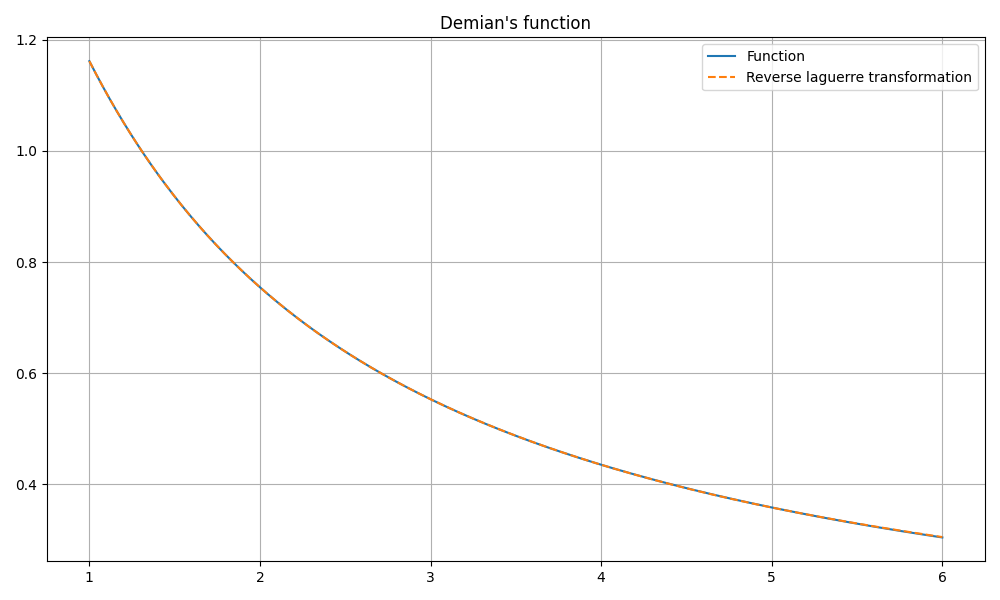

In [59]:
reverseTransformationData = pd.read_csv("../LaguerreCSharp/data/reverseTransformationData.csv")
columns = reverseTransformationData.columns

function_names = [col for col in columns if col != 'x']

num_functions = len(function_names) // 2

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(reverseTransformationData['x'], reverseTransformationData["funcDemian"], label="Function")
ax.plot(reverseTransformationData['x'], reverseTransformationData["funcDemian_transformed"], label="Reverse laguerre transformation", linestyle='--')
ax.set_title(f'Demian\'s function')
ax.legend()
plt.tight_layout()
plt.grid(True)
display(fig.canvas)

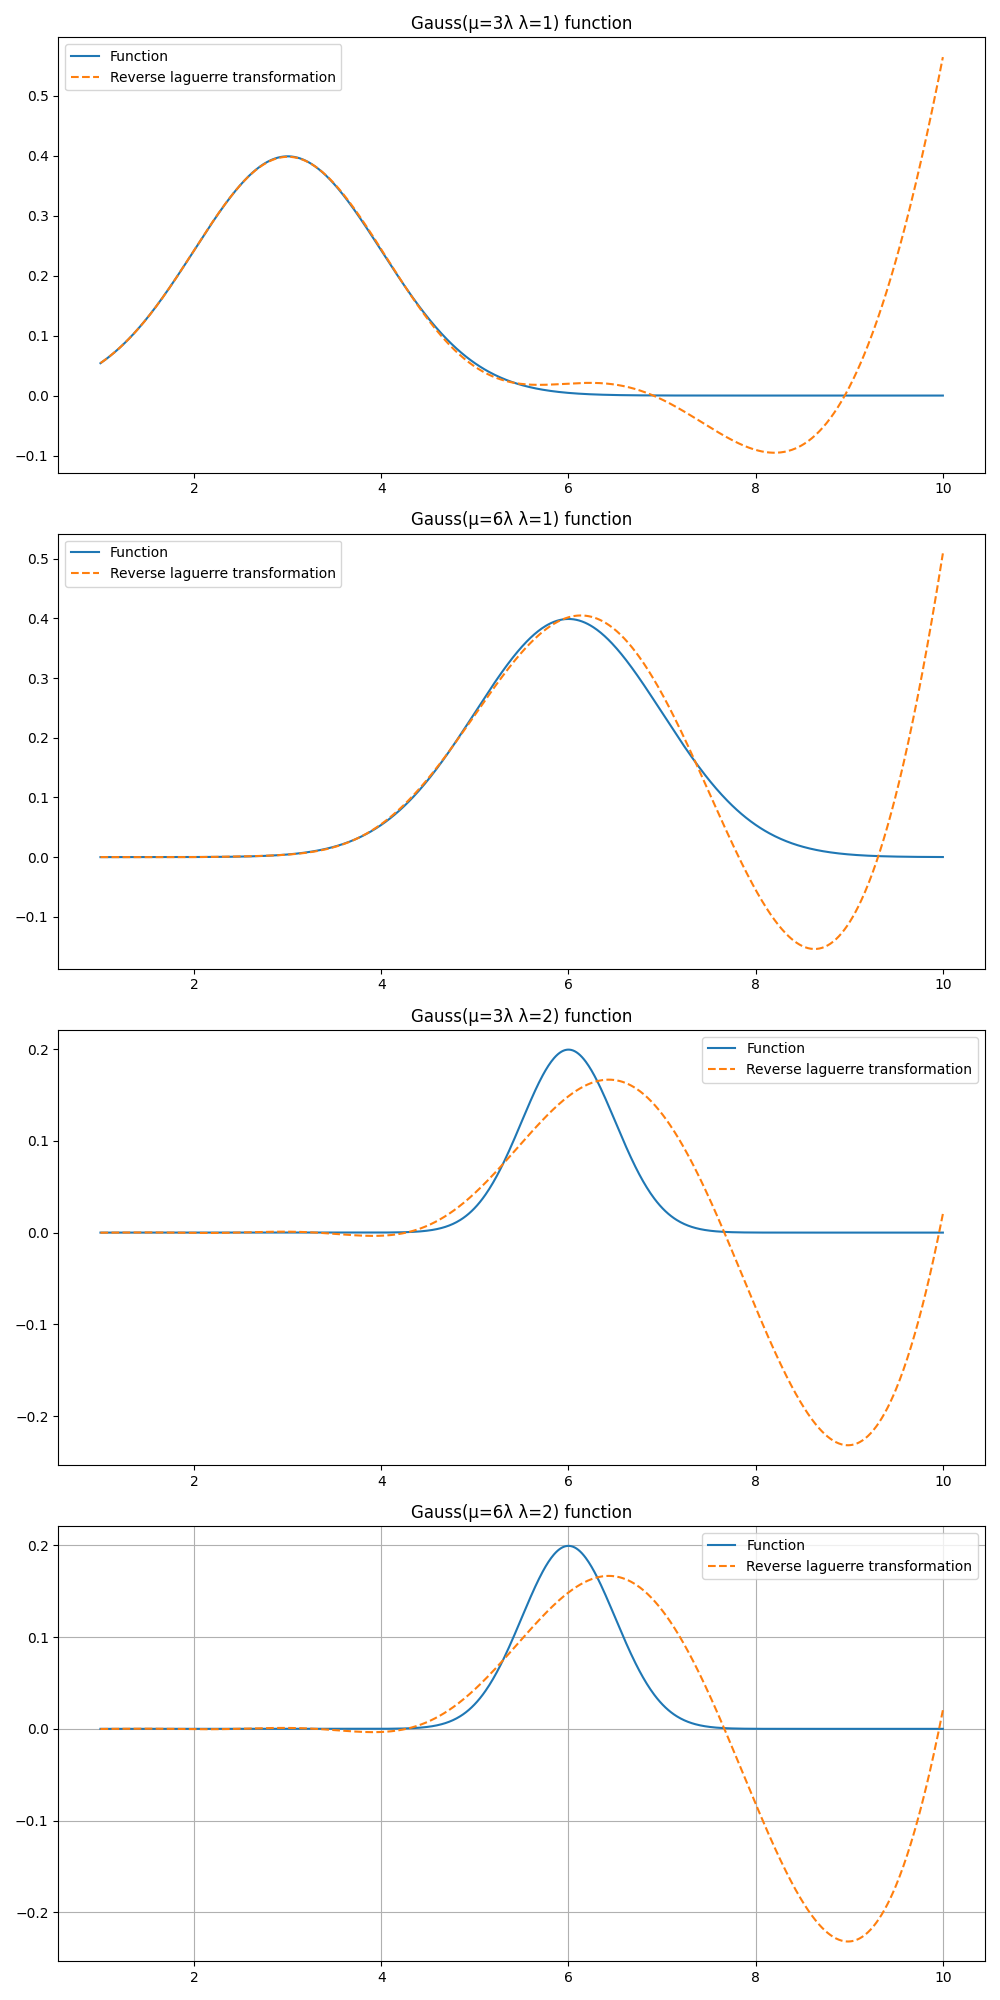

In [60]:
GaussReverseTransformationData = pd.read_csv("../LaguerreCSharp/data/GaussReverseTransformationData.csv")
columns = GaussReverseTransformationData.columns

function_names = [col for col in columns if col != 'x']
function_names
num_functions = len(function_names) // 2

fig, axs = plt.subplots(num_functions, 1, figsize=(10, 5*num_functions))

for i in range(num_functions):
    idx = i * 2
    func_name = function_names[idx].split("_")[0]
    transformed_name = function_names[idx + 1]

    axs[i].plot(GaussReverseTransformationData['x'], GaussReverseTransformationData[function_names[idx]], label="Function")
    axs[i].plot(GaussReverseTransformationData['x'], GaussReverseTransformationData[transformed_name], label="Reverse laguerre transformation", linestyle='--')
    axs[i].set_title(f'{func_name} function')
    axs[i].legend()

plt.tight_layout()
plt.grid(True)
display(fig.canvas)